<a href="https://colab.research.google.com/github/park-geun-hyeong/RNN_PRACTICE/blob/main/spem_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
path='/content/drive/MyDrive/keras_practice/Spem_detection/'

df=pd.read_csv(path+'spam.csv',encoding='latin1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df[['v1','v2']].isna().sum().sum()

0

In [ ]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df['v1']=df.replace(['ham','spam'],[0,1])

In [ ]:
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
print("V1의 중복되지 않는 value 개수:{0}, V2의 중복되지 않는 value 개수:{1}".format(df['v1'].nunique(),df['v2'].nunique()))

V1의 중복되지 않는 value 개수:2, V2의 중복되지 않는 value 개수:5169


In [ ]:
#V2값은 중복되는 값이 5572-5169개 만큼 있음을 확인할 수 있다.

df.drop_duplicates(subset=['v2'],inplace=True)

In [ ]:
df.shape

(5169, 2)

In [ ]:
a= df['v1'].value_counts()

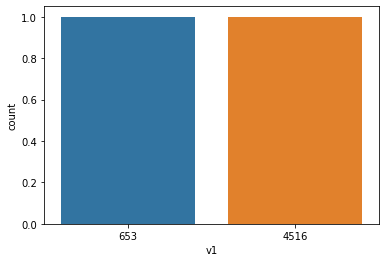

In [ ]:
sns.countplot(a)

In [ ]:
feature=df['v2']
target=df['v1']

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
l=WordNetLemmatizer()
import nltk
nltk.download('stopwords')

stop_words=stopwords.words('english')

def preprocess(text):
    text= text.lower()
    text= re.sub('[^A-Za-z]',' ', text)
    text= [t for t in text.split() if t not in stop_words]
    
    return ' '.join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
a = preprocess(df['v2'][0])

In [ ]:
a

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [ ]:
feature=feature.apply(preprocess)

In [ ]:
feature.head()

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry wkly comp win fa cup final tkts st ...
3                  u dun say early hor u c already say
4               nah think goes usf lives around though
Name: v2, dtype: object

In [ ]:
token=Tokenizer()
token.fit_on_texts(feature)
sequences = token.texts_to_sequences(feature)

In [ ]:
sequences[0]

[7, 3484, 630, 562, 523, 1015, 30, 56, 307, 767, 68, 2373, 1016, 12, 3485, 57]

In [ ]:
word_index=token.word_index
print(word_index)

{'u': 1, 'call': 2, 'get': 3, 'ur': 4, 'gt': 5, 'lt': 6, 'go': 7, 'ok': 8, 'free': 9, 'know': 10, 'like': 11, 'got': 12, 'good': 13, 'come': 14, 'day': 15, 'time': 16, 'want': 17, 'love': 18, 'text': 19, 'send': 20, 'going': 21, 'p': 22, 'one': 23, 'need': 24, 'lor': 25, 'home': 26, 'txt': 27, 'r': 28, 'see': 29, 'n': 30, 'still': 31, 'k': 32, 'stop': 33, 'back': 34, 'today': 35, 'da': 36, 'dont': 37, 'reply': 38, 'take': 39, 'hi': 40, 'think': 41, 'tell': 42, 'sorry': 43, 'new': 44, 'mobile': 45, 'please': 46, 'c': 47, 'well': 48, 'phone': 49, 'hey': 50, 'much': 51, 'oh': 52, 'hope': 53, 'night': 54, 'week': 55, 'great': 56, 'wat': 57, 'dear': 58, 'later': 59, 'b': 60, 'msg': 61, 'pls': 62, 'give': 63, 'make': 64, 'way': 65, 'claim': 66, 'happy': 67, 'e': 68, 'yes': 69, 'already': 70, 'number': 71, 'ask': 72, 'work': 73, 'yeah': 74, 'www': 75, 'really': 76, 'say': 77, 'im': 78, 'prize': 79, 'tomorrow': 80, 'right': 81, 'meet': 82, 'babe': 83, 'thanks': 84, 'cash': 85, 'find': 86, 'mes

In [ ]:
len(word_index)

7564

In [ ]:
vocab_size=len(word_index) + 1
print('vocab size:{}'.format(vocab_size))

vocab size:7565


In [ ]:
feature.shape

(5169,)

In [ ]:
feature[0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [ ]:
feature=sequences

In [ ]:
feature[0]

[7, 3484, 630, 562, 523, 1015, 30, 56, 307, 767, 68, 2373, 1016, 12, 3485, 57]

In [ ]:
print(max(len(i) for i in feature))
print(sum(map(len, feature))/len(feature))

77
8.793964016250726


(array([ 93., 861., 612., 927., 346., 504., 190., 347., 176., 319., 145.,
        224., 166.,  73.,  75.,  30.,  26.,   3.,   7.,   5.,  13.,   2.,
          5.,   3.,   4.,   2.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   1.,   0.,   0.,
          0.,   0.,   0.,   2.,   0.,   1.]),
 array([ 0.  ,  1.54,  3.08,  4.62,  6.16,  7.7 ,  9.24, 10.78, 12.32,
        13.86, 15.4 , 16.94, 18.48, 20.02, 21.56, 23.1 , 24.64, 26.18,
        27.72, 29.26, 30.8 , 32.34, 33.88, 35.42, 36.96, 38.5 , 40.04,
        41.58, 43.12, 44.66, 46.2 , 47.74, 49.28, 50.82, 52.36, 53.9 ,
        55.44, 56.98, 58.52, 60.06, 61.6 , 63.14, 64.68, 66.22, 67.76,
        69.3 , 70.84, 72.38, 73.92, 75.46, 77.  ]),
 <a list of 50 Patch objects>)

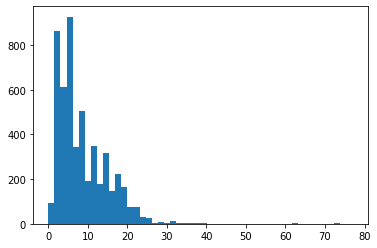

In [ ]:
plt.hist([len(i) for i in feature],bins=50)

In [ ]:
max_len=77

data = pad_sequences(feature, maxlen=max_len)
print(data.shape)

(5169, 77)


In [ ]:
data[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    7, 3484,  630,  562,  523,
       1015,   30,   56,  307,  767,   68, 2373, 1016,   12, 3485,   57],
      dtype=int32)

In [ ]:
target.shape

(5169,)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =  train_test_split(data,target, test_size= 0.2, random_state=0)

In [ ]:
x_train.shape,y_train.shape

((4135, 77), (4135,))

In [ ]:
x_test.shape,y_test.shape

((1034, 77), (1034,))

In [ ]:
model=Sequential()
model.add(Embedding(vocab_size,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['acc'])

history = model.fit(x_train_new, y_train_new , epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
52/52 [==============================] - 3s 33ms/step - loss: 0.4772 - acc: 0.8276 - val_loss: 0.3563 - val_acc: 0.8670
Epoch 2/4
52/52 [==============================] - 1s 21ms/step - loss: 0.3855 - acc: 0.8245 - val_loss: 0.2293 - val_acc: 0.9141
Epoch 3/4
52/52 [==============================] - 1s 20ms/step - loss: 0.1787 - acc: 0.9583 - val_loss: 0.1266 - val_acc: 0.9637
Epoch 4/4
52/52 [==============================] - 1s 21ms/step - loss: 0.0850 - acc: 0.9781 - val_loss: 0.0662 - val_acc: 0.9770


In [ ]:
x_train_new=np.asarray(x_train).astype(np.float32)

In [ ]:
x_train_new.shape

(4135, 77)

In [ ]:
y_train_new=np.asarray(y_train).astype(np.float32)

In [ ]:
x_test=np.asarray(x_test).astype(np.float32)
y_test=np.asarray(y_test).astype(np.float32)

In [ ]:
model.evaluate(x_test,y_test)

33/33 [==============================] - 0s 5ms/step - loss: 0.0726 - acc: 0.9787


[0.07259923964738846, 0.978723406791687]

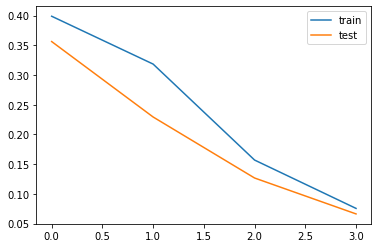

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','test'],loc='upper right')